In [1]:
import sys
from collections import Counter
import matplotlib.pyplot as plt
import string
import os
from collections import defaultdict, Counter

In [2]:
def create_histogram(word_counts, top_n=20):
    common_words = word_counts.most_common(top_n)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [3]:
def build_bigram_model(tokens):
    bigram_model = defaultdict(list)
    
    # Iterate over tokens to construct the bigram model
    for i in range(len(tokens) - 1):
        word1 = tokens[i]
        word2 = tokens[i + 1]
        bigram_model[word1].append(word2)
    
    return bigram_model

In [4]:
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read().lower()  # Case insensitive

In [5]:
def tokenize_text(text):
    return text.split()

In [6]:
def find_next_words(tokens, initial_set):
    following_words = []
    initial_set_len = len(initial_set)
    
    for i in range(len(tokens) - initial_set_len):
        if tokens[i:i+initial_set_len] == initial_set:
            following_words.append(tokens[i + initial_set_len])
    
    return following_words

In [7]:
def get_top_tokens(following_words, top_n=5):
    if not following_words:
        return None 
    
    word_counts = Counter(following_words)
    most_common = word_counts.most_common(top_n)
    return [word for word, _ in most_common]

In [8]:
def predict_next_token(file_path, initial_words):
    # Load and tokenize the text
    text = load_text(file_path)
    tokens = tokenize_text(text)
    
    initial_set = initial_words.split()
    following_words = find_next_words(tokens, initial_set)
    
    if not following_words:
        print(f"word : {initial_words} not found")
        most_common_words= get_top_tokens(tokens)
    else:
        most_common_words = get_top_tokens(following_words)
    
    print(f"Top 4 most likely next words: {most_common_words}")


In [9]:
def generate_word_counts(file_path):
    text = load_text(file_path)
    tokens = tokenize_text(text)
    word_counts = Counter(tokens)
    
    create_histogram(word_counts, top_n=50)

In [21]:
file_path = "/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/ChatGPT/Mahabharata_kisari_mohan_ganguly.txt"
initial_words = "the son of pandu with a thick"  

predict_next_token(file_path, initial_words)

Top 4 most likely next words: ['shower']


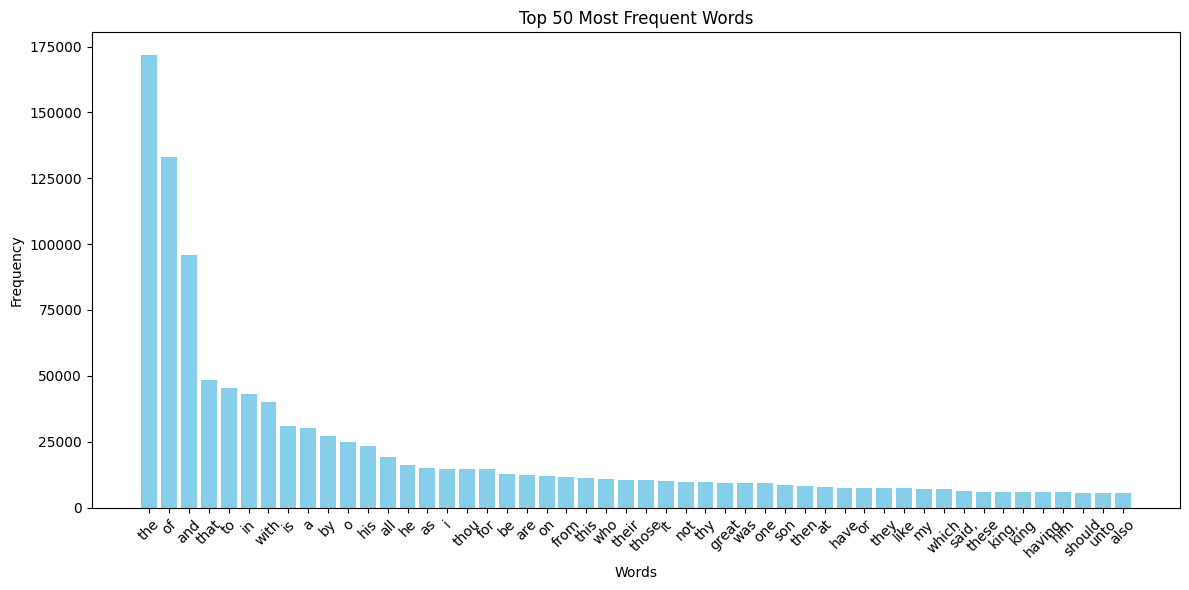

In [11]:
generate_word_counts(file_path)